# MONEY MANAGEMENT: STOCK PRICE FORCAST BY LSTM, A QUICK DEPLOYMENT

### Load Functions from Package

The above function can be predefined in a *.py* script. I already did that and we can load the script and call the function.

In [12]:
%run "../scripts/YinsMM.py"

-----------------------------------------------------

        Yin's Money Managment Package 
        Copyright © YINS CAPITAL, 2009 – Present
        For more information, please go to www.YinsCapital.com
        
-----------------------------------------------------


### Recurrent Neural Network (a sequential model)

Given data $X$ and $Y$, we want to feed information forward to into the network architecture with time stamp. Then we form some belief and we make some initial predictions. We investigate our beliefs by looking at the loss function of the initial guesses and the real value. We update our model according to the error we observed (which is the loss function).

### Architecture: Feed-forward

Let us see the following architecture: information with time stamp

$$
X_{<1>} \rightarrow X_{<2>} \rightarrow ... X_{<T>}
$$

and we establish feed forward network structure

$$\text{Information flow:} \rightarrow 
\begin{matrix}
Y_{<1>}, \hat{Y}_{<1>}    &             & Y_{<2>}, \hat{Y}_{<2>}  &                             & Y_{<T>}, \hat{Y}_{<T>} \\
\uparrow   &             & \uparrow & ... & \uparrow \\
X_{<1>}    & \rightarrow & X_{<2>}  & \rightarrow ... \rightarrow & X_{<T>} \\
\uparrow   &             & \uparrow & ... & \uparrow \\
w_{<1>}, b_{0, <1>} &             & w_{<2>}, b_{0, <2>} & ... & w_{<T>}, b_{0, <T>} \\
\end{matrix} \rightarrow \text{to form a series of beliefs about } Y_{t}
$$ 

while the educated guesses $\hat{Y}_{<\cdot>}$ are defined as $Y_{<\cdot>} = a(b_{0, <\cdot>} + \sum w_{<\cdot>} X_{<\cdot>})$.

Is this perfect? Initially, the guesses are mostly likely going to be randomly which means there are lots of mistakes. 

### Architecture: Feed-backward

We need to clearly define our loss function to make sure we have a proper grip of our mistakes. We investigate the mistakes and see what we can do to update our parameters. We do so by taking gradients (partial derivatives w.r.t. ceratin parameters).

$$ \mathcal{L} = \sum_{t} L(\hat{y}_{<t>} - y_{<t>})^2 $$

Update what we know

$$ \triangle = \frac{\partial \mathcal{L}}{\partial a} $$

then 

$$ \frac{\partial \triangle}{\partial w}, \frac{\partial \triangle}{\partial b} $$

Now we can go backwards and update our parameters

$$\text{Information flow:} \leftarrow 
\begin{matrix}
Y_{<1>}, \hat{Y}_{<1>}    &             & Y_{<2>}, \hat{Y}_{<2>}  &                             & Y_{<T>}, \hat{Y}_{<T>} \\
\uparrow   &             & \uparrow & ... & \uparrow \\
X_{<1>}    & \leftarrow & X_{<2>}  & \leftarrow ... \leftarrow & X_{<T>} \\
\uparrow   &             & \uparrow & ... & \uparrow \\
w_{<1>}, b_{0, <1>} &             & w_{<2>}, b_{0, <2>} & ... & w_{<T>}, b_{0, <T>} \\
\uparrow   &             & \uparrow &     & \uparrow \\
& & \text{update } w's, b's & \\
\end{matrix} \leftarrow \text{Total Loss: } \mathcal{L}(\hat{y}, y)
$$ 

Done.


### Regressor vs. Classifier

The design of deep learning regressor and classifier are dependent on the number of nodes in the last layer of the network architecture. 

#### Regressor

Output layer (last layer) has one neuron:
$$
\text{Input: } \rightarrow 
\begin{bmatrix}
\circ \\
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
\circ \\
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
\rightarrow \hat{Y}
$$

#### Classifier (K-class)

Output layer (last layer) has more than one ($K$) neuron, hence, a $K$-class classifier:
$$
\text{Input: } \rightarrow 
\begin{bmatrix}
\circ \\
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
\circ \\
\circ \\
\vdots \\
\circ \\
\end{bmatrix}
\rightarrow 
\begin{bmatrix}
\hat{Y}_{[1]} \\
\hat{Y}_{[2]} \\
\vdots \\
\hat{Y}_{[K]} \\
\end{bmatrix}
$$

In the end, we simply check which $K$ has the maximum value. The neuron that has the maximum value tells us which class the observation falls in. Hence, this is a $K$-class classifier.

------------------------------------------------------------------------------

                MANUAL: Try run the following line by line in a Python Notebook

                # Load
                %run "../scripts/YinsDL.py"

                # Run
                tmp = RNN3_Regressor(
                        start_date =   '2013-01-01', end_date   =   '2019-12-6',
                        tickers    =   'AAPL',       cutoff     =   0.8,
                        l1_units   =   50,           l2_units   =   50,           l3_units   =   50,
                        optimizer  =   'adam',       loss       =   'mean_squared_error',
                        epochs     =   50,           batch_size =   64,
                        plotGraph  =   True,         verbose   =   True )
                
------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
-------------------------------------------------------

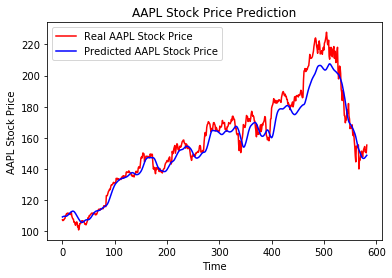

---------------------------------------------------------------------------------
Root Mean Square Error is 7.48 for test set.
------------------
Interpretation:
------------------
On the test set, the performance of this LSTM architecture guesses 
AAPL stock price on average within the error of $7.48 dollars.
---------------------------------------------------------------------------------


In [13]:
tmp = YinsMM.RNN3_Regressor(
    start_date = "2010-01-01",
    end_date = "2019-01-26",
    tickers = "AAPL",
    cutoff = 0.7,
    l1_units=128, l2_units=64, l3_units=32,
    optimizer='adam', loss='mean_squared_error', 
    epochs=20)